In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\dmm\OneDrive\Desktop\Bajato files\Personal\Python Project Datasets\airlines_flights_data.csv")

In [3]:
df.shape

(300153, 12)

In [4]:
df.drop("index", axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
n_col = ["days_left", "price"]
df[n_col] = df[n_col].apply(pd.to_numeric)

In [7]:
df["stops"].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [9]:
df[df["duration"] == 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [10]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

# Questions

In [12]:
# what are the airlines in the datset, accompaanied by their frequencies?

df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [13]:
df["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

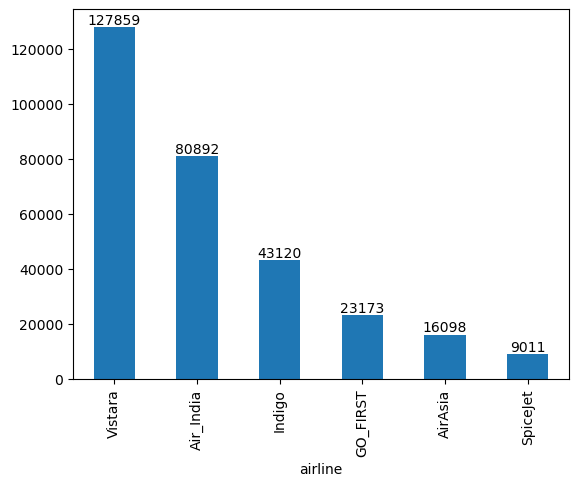

In [14]:
#  showing all the airlines with their number of flights in bar graph
ax = df["airline"].value_counts().plot(kind = "bar")
ax.bar_label(ax.containers[0])
plt.show()

In [15]:
df["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [16]:
# show bar graph representing the departure time & arrival time?
dt = df["departure_time"].value_counts()
dt

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [17]:
at = df["arrival_time"].value_counts()
at

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

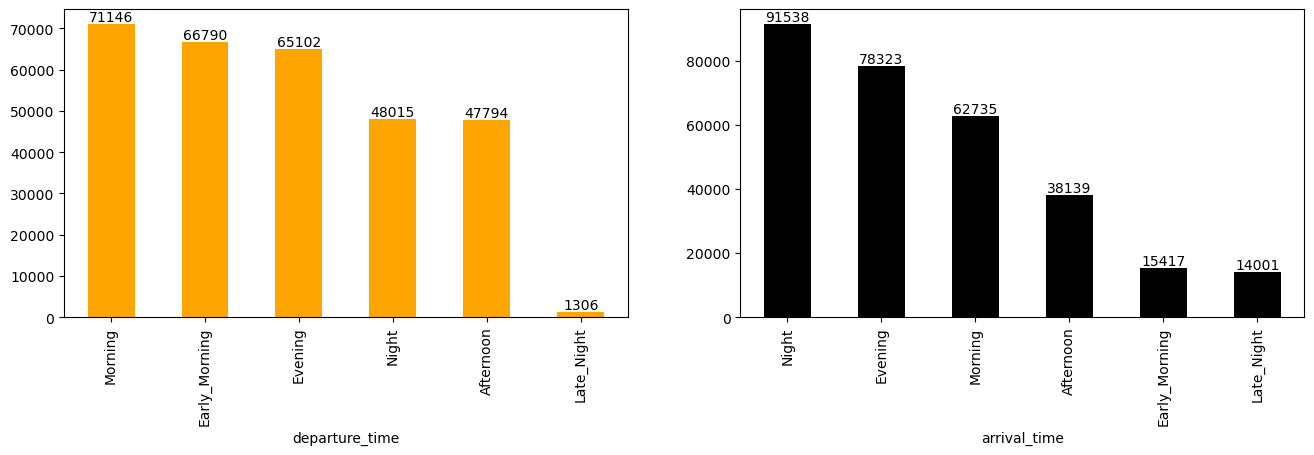

In [18]:
plt.figure(figsize = (16, 4))
plt.subplot(1, 2, 1)
dtt = dt.plot(x = dt.index, y = dt.values, kind = "bar", color = "orange")
dtt.bar_label(dtt.containers[0])

plt.subplot(1, 2, 2)
att = at.plot(x = at.index, y = at.values, kind = "bar", color = "black")
att.bar_label(att.containers[0])

plt.show()

In [19]:
# show bar graphs representing thesource city & destination city
sc = df["source_city"].value_counts()
sc

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [20]:
dc = df["destination_city"].value_counts()
dc

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

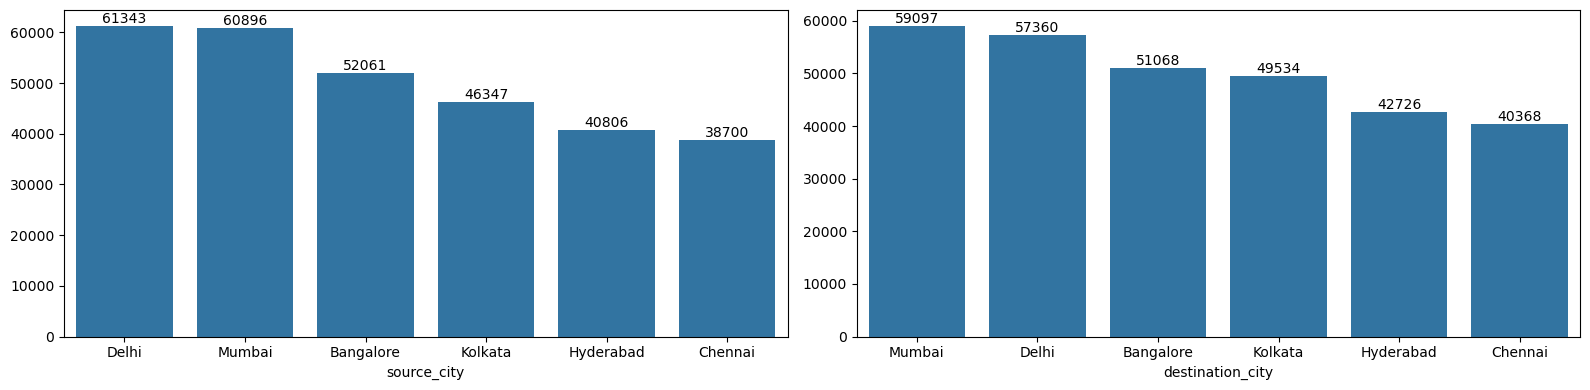

In [21]:
plt.figure(figsize = (16, 4))
c = 1
city_count = [sc, dc]
for i in city_count:
    #print(i)
    plt.subplot(1, 2, c)
    ct = sns.barplot( x = i.index, y = i.values)
    ct.bar_label(ct.containers[0])
    c+= 1

plt.tight_layout()
plt.show()

In [22]:
# does price with airlines
pc = df.groupby(["airline", "class"])["price"].mean().sort_values(ascending = False)
pc

airline    class   
Vistara    Business    55477.027777
Air_India  Business    47131.039212
Vistara    Economy      7806.943645
Air_India  Economy      7313.682169
SpiceJet   Economy      6179.278881
GO_FIRST   Economy      5652.007595
Indigo     Economy      5324.216303
AirAsia    Economy      4091.072742
Name: price, dtype: float64

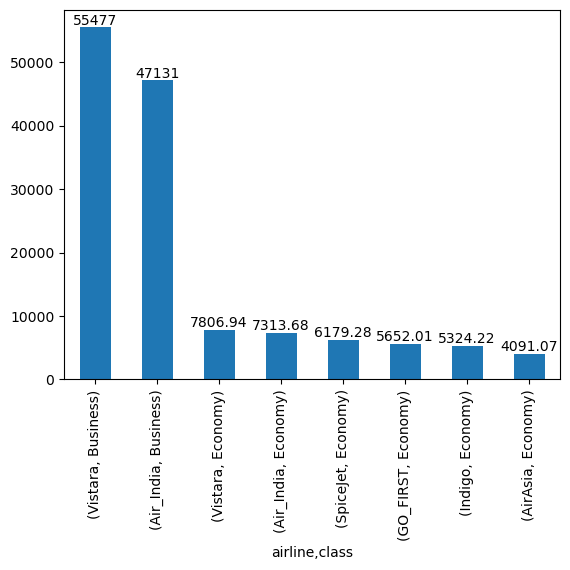

In [23]:
px = pc.plot(x = "airline" , y = pc.values, kind = "bar")
px.bar_label(px.containers[0])
plt.show()


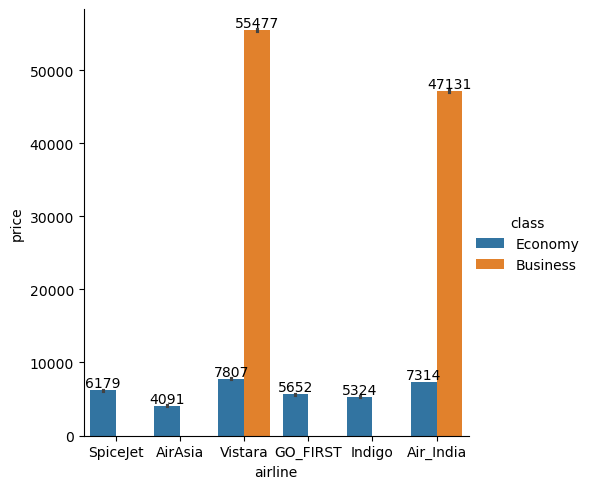

In [24]:
# drawing a categorical plot showing the mean ticket price for each airline

pxx = sns.catplot(x = "airline" , y = "price", data = df, kind = "bar", hue = "class" )
pxt = pxx.axes[0, 0]
for container in pxt.containers:
    pxt.bar_label(container, fmt="%.0f")
plt.show()

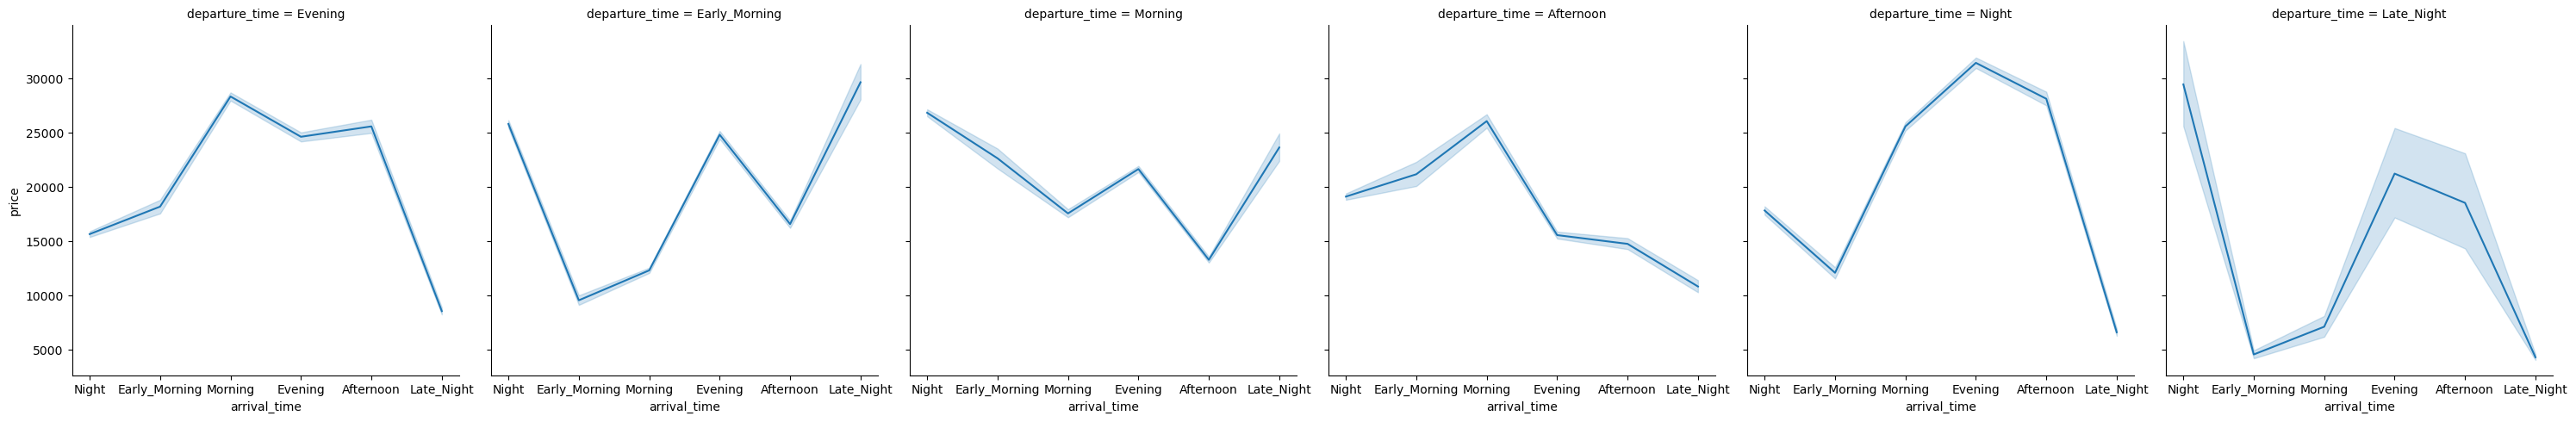

In [25]:
# does ticket price change based on the departure time and arrival time?

sns.relplot(x = "arrival_time", y = "price", data = df, col = "departure_time", kind = "line")
plt.show()

In [26]:
atp = df.groupby("arrival_time")["price"].mean().sort_values(ascending = False)
atp

arrival_time
Evening          23044.371615
Morning          22231.076098
Night            21586.758341
Afternoon        18494.598993
Early_Morning    14993.139521
Late_Night       11284.906078
Name: price, dtype: float64

In [27]:
dtp = df.groupby("departure_time")["price"].mean().sort_values(ascending = False)
dtp

departure_time
Night            23062.146808
Morning          21630.760254
Evening          21232.361894
Early_Morning    20370.676718
Afternoon        18179.203331
Late_Night        9295.299387
Name: price, dtype: float64

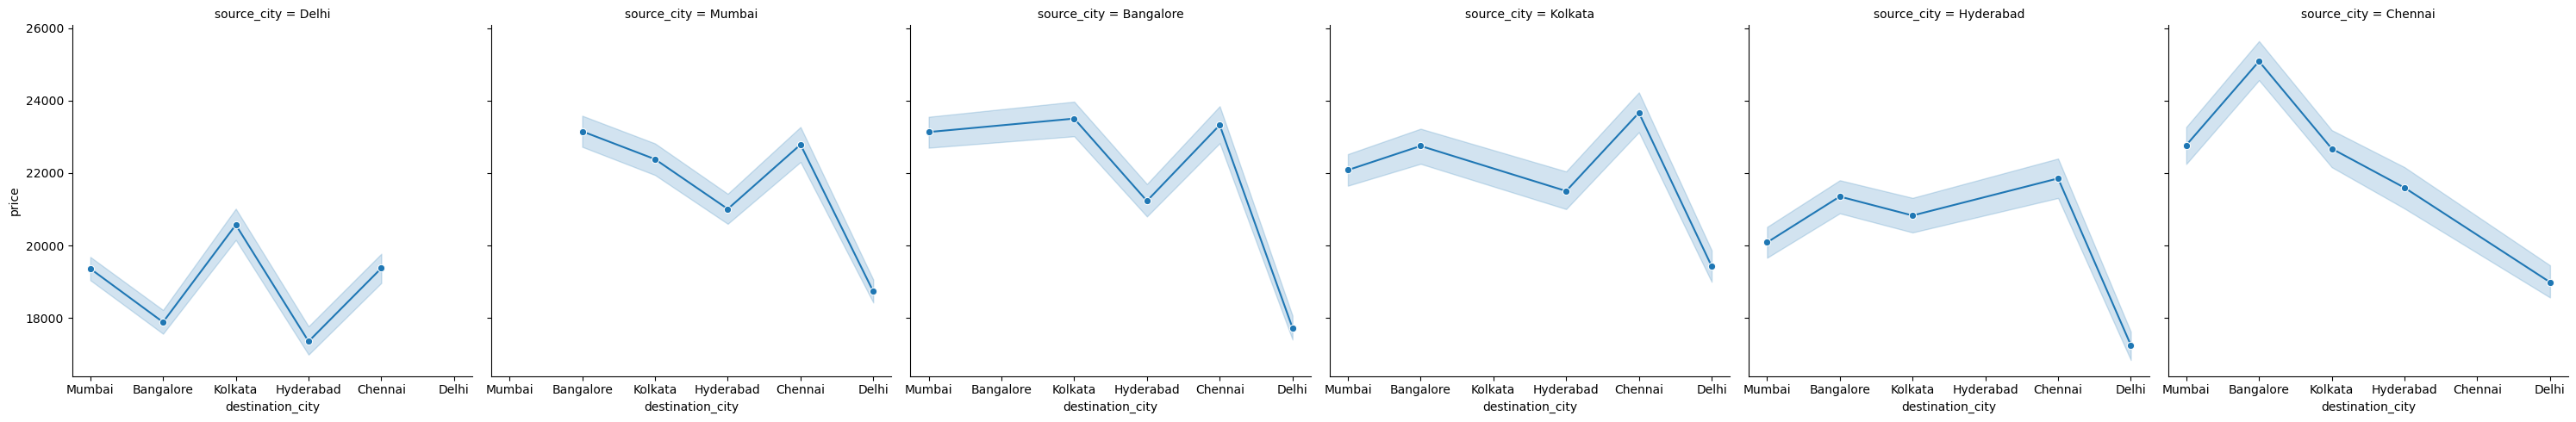

In [28]:
# how the price changes with chnage in Source & destination?

sns.relplot( x = "destination_city", y = "price", data = df, col = "source_city" , kind = "line", marker = "o")

plt.show()

In [77]:
# how is the price affected when tickets are brought is just 1 or 2 days before departure?
df.groupby("days_left")["price"].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

In [81]:
# how does the ticket price vary between economy and business class
df.groupby("class")["price"].mean()

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

In [85]:
# what will be the average price of vistara airline for a flight from delhi to hydrabad in business class?

new_data = df[(df["airline"] == "Vistara") & (df["source_city"] == "Delhi") & (df["destination_city"] == "Hyderabad") & (df["class"] == "Business")]
new_data


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [93]:
new_data["price"].mean()

47939.840361445786